### SPARKS TASKS

**AUTHOR : DHARSHINI M**

#### PREDICITION USING DECISION TREE CLASSIFIER ( LEVEL INTERMEDIATE)

#### DATASET => IRIS DATASET

In [57]:
## IMPORTING THE REQUIRED LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier

In [58]:
## READING THE DATA:

data=pd.read_csv("iris.csv")

In [59]:
## To view the data
print(data.head(10))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa


In [60]:
data=data.drop(['Id'],axis=1)

In [61]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [62]:
## To know the shape of the data:

data.shape

(150, 5)

##### There 150 rows and 5 columns in the dataset

In [63]:
## To know the datatypes of the columns :

data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [64]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [65]:
##### The target variable is object variable..So we need to convert it to Numerical variable.

data=data.replace({'Species':{'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}})

<AxesSubplot:>

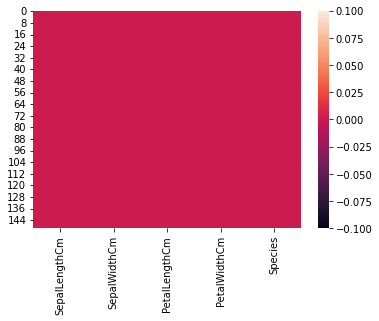

In [66]:
### TO CHECK WHETHER OUR DATA CONTAINS NULL VALUES ARE NOT...

sns.heatmap(data.isnull())

In [67]:
### There is no "Null Values" in the dataset.

In [68]:
### To check for the outliers in the dataset

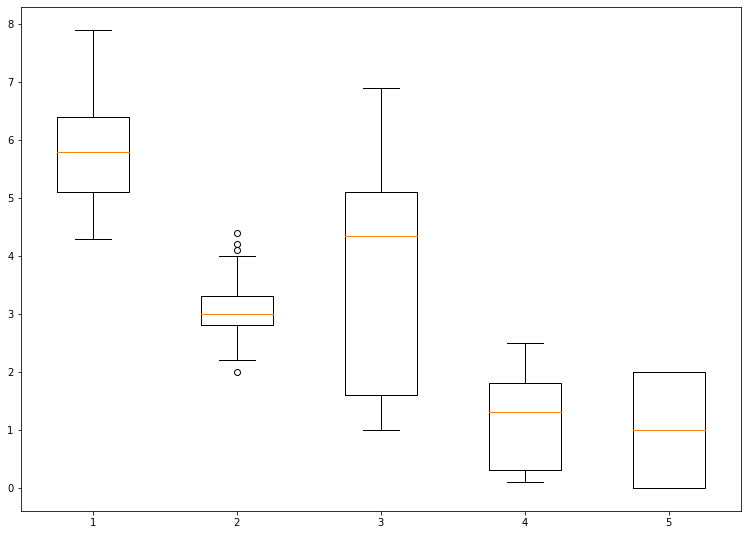

In [69]:
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()

##### There is some outliers in the dataset

###### INORDER TO PREDICT THE TARGET VARIABLE , LETS DO A SIMPLE CORRELEATION TO SEE IF THE VARIABLES HAVE RELATION WITH THE TARGET VARIABLE . WE CAN REMOVE THE SEPAL WIDTH CM ATTRIBUTE TO HAVE A BETTER ACCURACY.

In [70]:
corr_result=data.corr()

<AxesSubplot:>

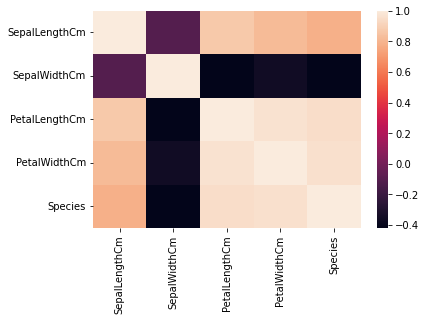

In [71]:
## Now for better understanding , lets visualize correlation results using heatmap
sns.heatmap(corr_result)

##### Except the SepalWidthCm all other variables has good correlation with the target variable.

In [72]:
## lets remove that variable

data=data.drop(['SepalWidthCm'],axis=1)


In [73]:
## SEPERATING THE DATA INTO INDEPENDANT VARIABLES

X=data.drop(['Species'],axis=1)
Y=data['Species']


In [74]:
X.head()

,SepalLengthCm,PetalLengthCm,PetalWidthCm
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2


In [75]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

### DECISION TREE CLASSIFIER:

In [76]:
### applying cross validation for data.
from sklearn.model_selection import cross_val_score

max_depth=[1,2,3,4,5,6,7,8,9,10]

for val in max_depth:
    dtc_1=dtc= DecisionTreeClassifier(criterion='entropy', random_state=0,max_depth=val)
    accuracy_cross_val=cross_val_score(dtc_1,X,Y,scoring='accuracy',cv=5)
    print(f'Average score({val}): {"{:.3f}".format(accuracy_cross_val.mean())}')

Average score(1): 0.667
Average score(2): 0.933
Average score(3): 0.960
Average score(4): 0.953
Average score(5): 0.953
Average score(6): 0.953
Average score(7): 0.953
Average score(8): 0.953
Average score(9): 0.953
Average score(10): 0.953


### So for the max_depth of "2" the model yields good accuracy than other max_depth values.

In [79]:
dtc_1=DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=3)
accuracy_cross_val=cross_val_score(dtc_1,X,Y,scoring='accuracy',cv=5)
print(f'Average score({3}): {"{:.3f}".format(accuracy_cross_val.mean())}')

Average score(3): 0.960


##### visualizing the tree:

[Text(209.25, 475.65000000000003, 'X[1] <= 2.45\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(139.5, 339.75, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(279.0, 339.75, 'X[2] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(139.5, 203.85000000000002, 'X[1] <= 4.95\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(69.75, 67.94999999999999, 'entropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(209.25, 67.94999999999999, 'entropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(418.5, 203.85000000000002, 'X[1] <= 4.85\nentropy = 0.151\nsamples = 46\nvalue = [0, 1, 45]'),
 Text(348.75, 67.94999999999999, 'entropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(488.25, 67.94999999999999, 'entropy = 0.0\nsamples = 43\nvalue = [0, 0, 43]')]

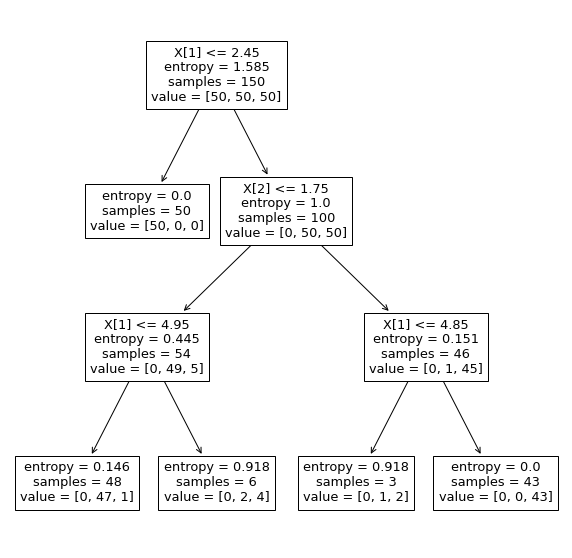

In [80]:
from sklearn import tree
dtc_1.fit(X,Y)
plt.figure(figsize=(10,10))
tree.plot_tree(dtc_1)